### This is simple data set of US superstore.

### CONTEXT

The online sector, referred to as “clicks,” has been slowly eating up market share in the past two decades.

E-commerce platform allows people to buy products from books, toys, clothes, and shoes to food, furniture, and other household items.

In [1]:
import os             # Working directory
import warnings       # exclude/ignore warnings
import numpy as np    # for processing the data
import matplotlib.pyplot as plt    # for visualization/Graph
import matplotlib
import pandas as pd                # for processing the data
import statsmodels.api as sm       # forecasting
from pylab import rcParams         # setting up the chart elements for visualization
from statsmodels.tsa.stattools import adfuller  # stationarity
from numpy import log              # stationarity
from pmdarima.arima.utils import ndiffs    # stationarity
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # ACF & PACF plots
from statsmodels.tsa.arima_model import ARIMA  # applying ARIMA
import pmdarima as pm              # applying ARIMA

In [2]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
os.chdir(r'D:\for github\TS\TS_Case1')
os.getcwd()
df = pd.read_excel("Superstore.xls")
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [4]:
df.tail(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9984,9985,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9986,9987,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


### OBJECTIVE : FORECASTING FURNTIURE SALES FOR THE RETAIL STORE

In [5]:
furniture = df.loc[df['Category'] == 'Furniture']

print(furniture['Order Date'].min())
print(furniture['Order Date'].max())

2014-01-06 00:00:00
2017-12-30 00:00:00


from above output we can conclude we have Four years of data.

### Data Pre-Processing

In [6]:
#Checking Missing Values
furniture.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### predicting sales on monthly level

In [7]:
#Arranging the Data chronoligcal order
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
print(furniture)

    Order Date      Sales
0   2014-01-06  2573.8200
1   2014-01-07    76.7280
2   2014-01-10    51.9400
3   2014-01-11     9.9400
4   2014-01-13   879.9390
..         ...        ...
884 2017-12-24  1393.4940
885 2017-12-25   832.4540
886 2017-12-28   551.2568
887 2017-12-29  2330.7180
888 2017-12-30   323.1360

[889 rows x 2 columns]


In [8]:
#Indexing with Time Series
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

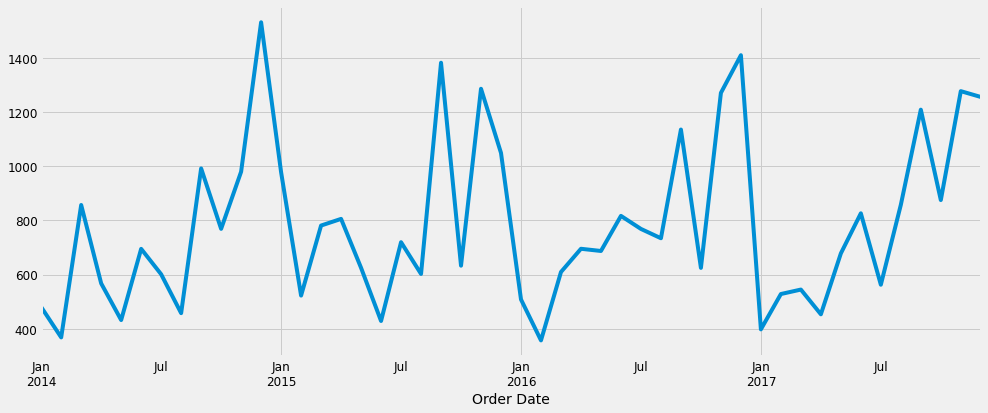

In [9]:
#Work at the Average Monthly Sales
y = furniture['Sales'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

### Decomposing the Data: Trend, Seasonal and Irregular Component 

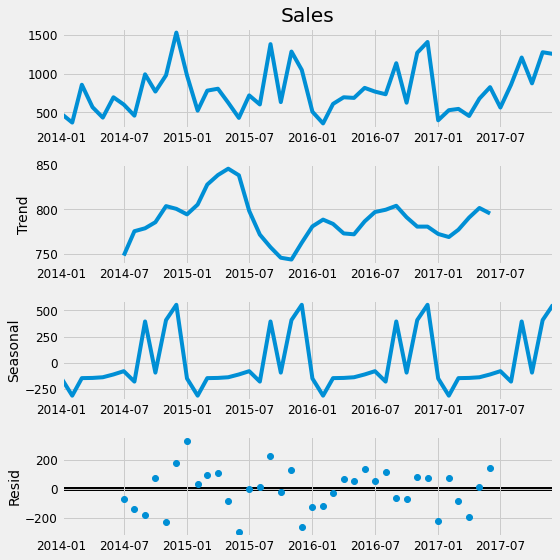

In [10]:
rcParams['figure.figsize'] = 8, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

### Checking the Stationarity of the Model

In [11]:
y_1 = y.reset_index()
#result = adfuller(y_1.Sales.dropna())
#print('ADF Statistic: %f' % result[0])
#print('p-value: %f' % result[1])

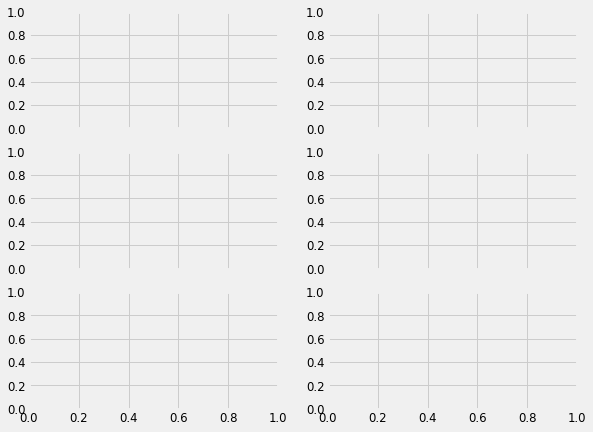

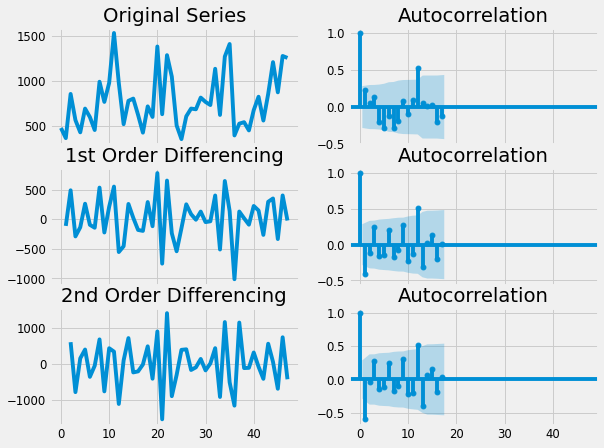

In [12]:
# More Visualization
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':70})

fig, axes = plt.subplots(3, 2, sharex=True)

#Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(y_1.Sales); axes[0, 0].set_title('Original Series')
plot_acf(y_1.Sales, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y_1.Sales.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y_1.Sales.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(y_1.Sales.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y_1.Sales.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

here we can conclude that the 1st order differencing and 2nd order differencing is stationarity w.r.t original Series.

In [13]:
result_1 = adfuller(y_1.Sales.diff().dropna())
print('ADF Statistic: %f' % result_1[0])
print('p-value: %f' % result_1[1])

ADF Statistic: -6.981398
p-value: 0.000000


Here p value is low, so we reject the null hypothesis and accept the alternative hypothesis data is stationarity.

### Finding the AR Term of Model

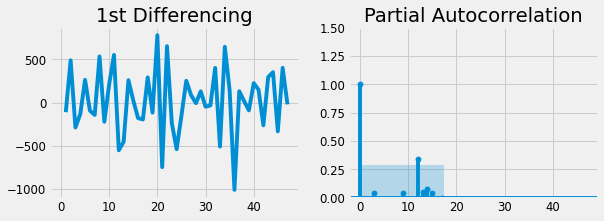

In [14]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':70})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(y_1.Sales.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.5))
plot_pacf(y_1.Sales.diff().dropna(), ax=axes[1])

plt.show()

### Finding the MA Term of Model

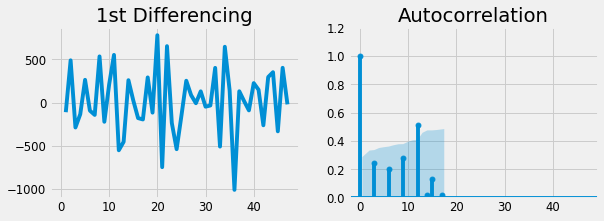

In [15]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(y_1.Sales.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(y_1.Sales.diff().dropna(), ax=axes[1])

plt.show()

### Fittting the SARIMA Model

Trend Elements

p: Trend autoregression order.
d: Trend difference order.
q: Trend moving average order.

Seasonal Elements

P: Seasonal autoregressive order.
D: Seasonal difference order.
Q: Seasonal moving average order.
m: The number of time steps for a single seasonal period.

In [16]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,   # Not enforceing stationarity
                                enforce_invertibility=False)  # Model do converge, Model is estimatble
results = mod.fit()
print(results.summary().tables[1])

import pmdarima as pm

from pmdarima.arima import auto_arima

# arguments for non-sessonal & seasonal 
auto_mod = auto_arima(y, start_P = 0, start_q = 0, max_p = 6, max_q = 6, 
                      Start_P = 0,Start_Q = 0, Max_P = 6, Max_Q = 6, m=12,
                     seasonal = True, Trace= True, n_fits=10, stepwise = True)
print(auto_mod)

auto_mod.summary()

prediction_auto_arima = pd.DataFrame(auto_mod.predict(n_periods=12))
print(prediction_auto_arima)
prediction_auto_arima = pd.Series(auto_mod.predict(n_periods=12))
print(prediction_auto_arima)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04
 ARIMA(0,0,0)(0,1,1)[12]          
              0
0    570.832727
1    447.093333
2    676.301605
3    615.484129
4    614.152623
5    703.658199
6    655.642749
7    681.722174
8   1178.225096
9    730.566286
10  1209.933827
11  1300.554437
0      570.832727
1      447.093333
2      676.301605
3      615.484129
4      614.152623
5      703.658199
6      655.642749
7      681.722174
8     1178.225096
9      730.566286
10    1209.933827
11    1300.554437
dtype: float64


### Validating the Forecast

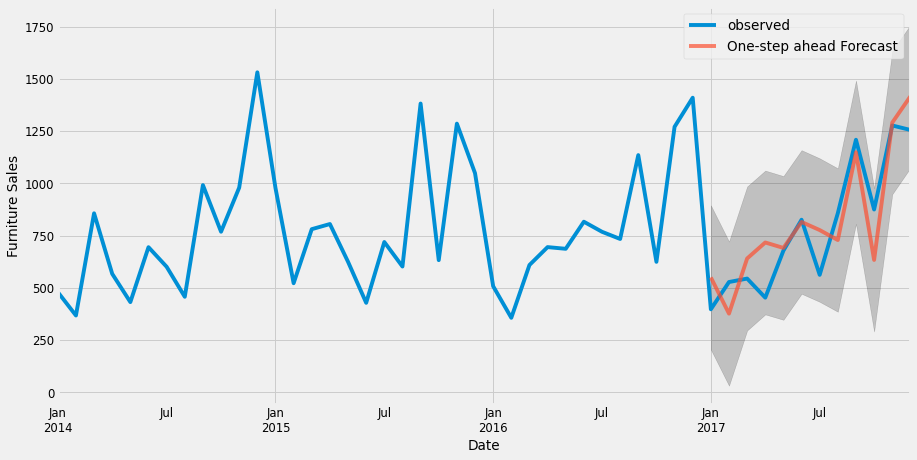

The Mean Squared Error of our forecasts is 22993.57
The Root Mean Squared Error of our forecasts is 151.64


In [17]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))



In [18]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(y_forecasted, y_truth)

{'mape': 0.20471926813552124,
 'me': 26.91896839726519,
 'mae': 125.54732461138174,
 'mpe': 0.07562958233172808,
 'rmse': 151.636302686403,
 'corr': 0.8767746875918382,
 'minmax': 0.16574895855947247}